<a href="https://colab.research.google.com/github/RioAccountant/capstones/blob/main/V7_Capstonehelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File location:
https://github.com/ZacharyFry1/Capstone_Project_UFOs/blob/main/NM_UFO_DATA_ALL_LAT_LON_ADDED.csv



```
# This is formatted as code
```

#Import Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#This is a connection to the original dataset w.o lat and lon-FOR REFERENCE ONLY
#url="https://raw.githubusercontent.com/ZacharyFry1/Capstone_Project_UFOs/refs/heads/main/NM_UFO_DATA_ALL.csv"
#df=pd.read_csv(url, encoding='latin-1')

In [3]:
url="https://raw.githubusercontent.com/ZacharyFry1/Capstone_Project_UFOs/refs/heads/main/NM_UFO_DATA_ALL_LAT_LON_ADDED.csv"
ufo_df=pd.read_csv(url, encoding='latin-1')

##Initial EDA

In [4]:
ufo_df.shape

(1703, 12)

In [5]:
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         1703 non-null   object 
 1   Occurred     1702 non-null   object 
 2   City         1685 non-null   object 
 3   State        1703 non-null   object 
 4   Country      1703 non-null   object 
 5   Shape        1633 non-null   object 
 6   Summary      1702 non-null   object 
 7   Reported     1703 non-null   object 
 8   Media        82 non-null     object 
 9   Explanation  22 non-null     object 
 10  Latitude     1703 non-null   object 
 11  Longitude    1703 non-null   float64
dtypes: float64(1), object(11)
memory usage: 159.8+ KB


In [6]:
#Correct the City data type to string
ufo_df['City']=ufo_df['City'].apply(str)

In [7]:
# Test data type correction to 'City' column
print(ufo_df['City'].apply(type).value_counts())

City
<class 'str'>    1703
Name: count, dtype: int64


## From the original dataset it is know that the "City" column is not consistently keyed.  Using regular expression functionality and string replacement we will work to clean the dataset and create a "City_New" column for our analysis & comparison.

##Within the original City we detected 18 null Cities-these will be kept and coded to New Mexico w/state centric location
null_city = ufo_df[ufo_df["City_New"]== ""]
null_city

In [8]:
#Detection of original 18 null Cities in original data-these were kept and coded to New Mexico w/state centric coordinates.
null_city = ufo_df[ufo_df["City"]== ""]
null_city

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation,Latitude,Longitude


In [9]:
#Look at those where the City is erroneously coded as NM- also kept and coded New_City as New Mexico w/state centric coordinates.
null_city = ufo_df[ufo_df["City"]== ""]
ufo_df[ufo_df["City"]== "New Mexico"]

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation,Latitude,Longitude
602,Open,1/15/2015 11:00,New Mexico,NM,USA,Triangle,They have been taking me since I was little an...,1/23/2022,NaN,NaN,34.9727,105.0324
603,Open,2/2/2011 16:40,New Mexico,NM,USA,Circle,Many UFO over new mexico white and green,2/4/2011,NaN,NaN,34.9727,105.0324
604,Open,10/9/2009 23:00,New Mexico,NM,USA,Cone,colors shined where can tell the shape of the ...,10/13/2009,NaN,NaN,34.9727,105.0324
605,Open,6/4/2007 13:00,New Mexico,NM,USA,Disk,2 pictures taken from a airplane of an object ...,7/27/2007,NaN,NaN,34.9727,105.0324
606,Open,10/25/2003 13:00,New Mexico,NM,USA,Other,Pictures of a landscape in New Mexico where my...,5/11/2010,NaN,NaN,34.9727,105.0324
607,Open,6/1/1997 3:30,New Mexico,NM,USA,Disk,"on hwy 10east going to elpaso texas.,,, slow m...",4/4/1999,NaN,NaN,34.9727,105.0324
608,Open,2/21/1994 19:00,New Mexico,NM,USA,Light,flashing bright lights following 60mph auto at...,2/27/2004,NaN,NaN,34.9727,105.0324
609,Open,6/1/1989 0:00,New Mexico,NM,USA,Orb,metalic orb huvering above the ground in new m...,9/4/2008,NaN,NaN,34.9727,105.0324
610,Open,6/30/1966 0:01,New Mexico,NM,USA,Disk,followed for about 15 minutes by saucer like o...,12/17/2005,NaN,NaN,34.9727,105.0324


In [10]:
#In reference to original column create a dupliate for corrected values
ufo_df['City_New'] = ufo_df['City']


In [27]:
ufo_df.head(19)

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation,Latitude,Longitude,City_New
0,Open,9/19/2016 18:22,Cloverdale,NM,USA,Disk,Two saucer shaped clear images at 31 26 14N 10...,9/19/2016,NaN,NaN,31.415807,-108.915531,CLOVERDALE
1,Open,3/19/1991 2:00,"Chihuahua Mts (north of, mexican border)",NM,USA,Light,I was conducting survielance for the military ...,10/30/1998,NaN,NaN,31.427695,-108.791149,CHIHUAHUA MTS
2,Open,11/26/2023 14:30,Columbus,NM,USA,Oval,Blimp or hot air balloon like object just belo...,11/27/2023,NaN,NaN,31.827448,-107.638108,COLUMBUS
3,Open,12/2/2013 20:06,Columbus,NM,USA,Other,Nine small balls of light with tails in arrow ...,12/2/2013,NaN,NaN,31.827448,-107.638108,COLUMBUS
4,Open,6/17/2016 21:10,Rodeo,NM,USA,Light,"Extremely bright, continuoulsy luminous, objec...",6/18/2016,NaN,NaN,31.835878,-109.030477,RODEO
5,Open,4/8/2014 20:45,Rodeo,NM,USA,Light,Reddish-orange craft with no blinking nav ligh...,4/8/2014,NaN,NaN,31.835878,-109.030477,RODEO
6,Open,1/28/1929 15:41,Santa Teresa,NM,USA,Circle,large craft with other smaller crafts moving f...,1/6/2021,NaN,NaN,31.851827,-106.640427,SANTA TERESA
7,Open,11/11/2019 20:30,El Paso,NM,USA,Light,"8-12 objects seen from plane, above them at ov...",11/26/2019,NaN,NaN,31.985619,-106.603502,EL PASO
8,Open,11/23/2000 18:37,El Paso and Alamogordo (Between ),NM,USA,Cigar,A dark cigar-shaped object with no lights that...,11/23/2000,NaN,NaN,31.985619,-106.603502,ALAMOGORDO
9,Open,11/3/2013 7:00,Anthony,NM,USA,Changing,Object would move n stop.,11/3/2013,NaN,NaN,32.012244,-106.603248,ANTHONY


In [ ]:
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' ?\(.+\)', '', regex=True)
ufo_df['City_New'] = ufo_df['City_New'].str.replace('^$', 'Other', regex=True)
ufo_df['City_New'] = ufo_df['City_New'].str.replace('\/.*', '', regex=True)

In [11]:
ufo_df['City_New'] = ufo_df['City_New'].str.replace('35.451099,Other106.150200', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('nan', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Nowhere', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Alburquerque', 'Albuquerque')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('White Sand New Mexico North Ocuro Peak', 'White Sands')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Between Clayton and Capulin, NM', 'Clayton')

In [12]:
ufo_df['City_New'] = ufo_df['City_New'].str.replace('-', 'Other')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('NaN', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('nan', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Unknown', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Television program', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Nowhere', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' Downs', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' Indian Reservation', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' Missile Range', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' missile range', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Abiqui', 'Abiquiu')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Abiquiuu', 'Abiquiu')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' National', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' Monument', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Abo ruins near ', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(', west of.', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Along HWY 550 Near ', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Canyon', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Pueblo', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Rural ', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Villa Nueva State Park', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Villa Nueva', 'Villanueva')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Outside of ', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' County', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Ft. Carson; IOther25 south', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Desert', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Other', 'New Mexico')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('INew Mexico10, Marker 174', 'Interstate 10')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('unsure, possibly Des Moines or Grenville', 'Des Moines')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Lincoln Forest', 'Lincoln')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Fence lake new Mexico', 'Fence Lake')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' area', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' and Albuquerque', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Near Jemez', 'Jemez Springs')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Hondo, Seco', 'Hondo Seco')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Alburquerque', 'Albuquerque')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Albuqueruque', 'Albuquerque')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('INew Mexico10 eastbound @ markers 2New Mexico65', 'Interstate 10')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('YahNew MexicotaNew Mexicohey', 'Yah-ta-hey')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('El Paso and Alamogordo', 'Alamogordo')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('St Augustine Pass ', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('Ranco', 'Rancho')
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' Cavrans', '')
ufo_df['City_New'] = ufo_df['City_New'].str.upper()
ufo_df['City_New'] = ufo_df['City_New'].str.replace('CORNER', 'CORNERS')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('CLINES CORNERSS', 'CLINES CORNERS', -1)
ufo_df['City_New'] = ufo_df['City_New'].str.replace(' & MORIRITY', '')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('BERNALLILO', 'BERNALILLO')
ufo_df['City_New']=ufo_df['City_New'].str.rstrip()
ufo_df['City_New'] = ufo_df['City_New'].str.replace('CANON AFB', 'CANNON AFB')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('BLUEWATER LAKE', 'BLUEWATER')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('BLUEWATER VILLAGE', 'BLUEWATER')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('CHACO  HISTORIC PARK', 'CHACO')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('CHACO CULTURE PARK', 'CHACO')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('DZILTHNEW MEXICONANEW MEXICOONEW MEXICODITHLE', 'DZILTH-NA-O-DIT-HLE')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('LORDSBURG AND SILVER CITY', 'LORDSBURG')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('TIJERES', 'TIJERAS')
ufo_df['City_New'] = ufo_df['City_New'].str.replace('HERNEW MEXICODEZ', 'HERNANDEZ')
ufo_df.loc[1181, 'City_New'] = 'VILLANUEVA'

In [13]:
#Code cell for any final modificaitons.
ufo_df['Shape'] = ufo_df['Shape'].str.replace('triangle', 'Triangle')

#Let generate a unique list of shapes
unique_shapes = ufo_df['Shape'].unique()

#To see the output run the following code:
print(unique_shapes)


['Disk' 'Light' 'Oval' 'Other' 'Circle' 'Cigar' 'Changing' 'Triangle'
 'Formation' 'Fireball' 'Unknown' 'Orb' 'Chevron' 'Sphere' 'Rectangle'
 'Diamond' 'Teardrop' 'Cylinder' nan 'Star' 'Cone' 'Egg' 'Flash' 'Cube'
 'Cross']


In [14]:
ufo_df.dropna(subset=['Occurred'], inplace=True)

## Code Sections Below used for visual review during cleaning.

In [15]:
#Use this to display original City and "City_New"

ufo_df[1520:1525]

,Link,Occurred,City,State,Country,Shape,Summary,Reported,Media,Explanation,Latitude,Longitude,City_New
1521,Open,11/17/2019 1:00,Dzilth-na-o-dithle,NM,USA,NaN,Strange lights flashing through windows and sk...,11/19/2019,NaN,NaN,36.392439,-107.834965,DZILTH-NA-O-DIT-HLE
1522,Open,7/7/2017 1:00,Dzilth-na-o-dithle,NM,USA,Other,Going to sleep around 1:00 a.m. With 4 of my n...,11/18/2019,NaN,NaN,36.392439,-107.834965,DZILTH-NA-O-DIT-HLE
1523,Open,10/21/2022 13:12,Taos,NM,USA,Egg,Objects appears to just pop in sight. They mov...,10/22/2022,Y,NaN,36.406326,-105.573264,TAOS
1524,Open,6/28/2022 2:00,Taos,NM,USA,Light,Intense white light coming through our bedroom...,6/29/2022,Y,NaN,36.406326,-105.573264,TAOS
1525,Open,10/16/2021 10:30,Taos,NM,USA,Cigar,Cigar object that caught my attention,10/17/2021,NaN,NaN,36.406326,-105.573264,TAOS


In [16]:
unique_cities2 = ufo_df['City_New'].unique()
print(unique_cities2)

['CLOVERDALE' 'CHIHUAHUA MTS' 'COLUMBUS' 'RODEO' 'SANTA TERESA' 'EL PASO'
 'ALAMOGORDO' 'ANTHONY' 'MCGREGOR RANGE' 'CAMP MCGREGOR' 'JAL' 'LA MESA'
 'VADO' 'ALVARADO' 'MESQUITE' 'WHITE CITY' 'GAGE' 'DEMING' 'INTERSTATE 10'
 'LOVING' 'FAIRACRES' 'LAS CRUCES' 'LORDSBURG' 'AGUIRRE SPRINGS'
 'DONA ANA' 'CARLSBAD' 'RADIUM SPRINGS' 'HATCH' 'HURLEY' 'HOBBS' 'SALEM'
 'SILVER CITY' 'SANTA CLARA' 'WHITE SANDS' 'ARENAS VALLEY' 'FORT BAYARD'
 'HOPE' 'SAN LORENZO' 'LOCO HILLS' 'ARTESIA' 'ARREY' 'HOLLOMAN AFB'
 'ALAMAGORDO' 'MIMBRES' 'PINOS ALTOS' 'KINGSTON'
 'WHITE SAND NEW MEXICO NORTH OCURO PEAK' 'LOVINGTON' 'CLOUDCROFT' 'CLIFF'
 'GILA' 'LA LUZ' 'CABALLO' 'BUCKHORN' 'TULAROSA' 'HAGERMAN'
 'TRUTH OR CONSEQUENCES' 'MESCALERO' 'ELEPHANT BUTTE' 'DEXTER' 'TATUM'
 'GLENWOOD' 'RUIDOSO' 'RUIDSOSO' 'WINSTON' 'TINNIE' 'ALMA' 'ROSWELL'
 'ALTO' 'LAKE BONITA' 'LINCOLN' 'NOGAL' 'CARRIZOZO' 'LUNA' 'KENNA'
 'SAN ANTONIO' 'SEDILLO HILL' 'SOCORRO' 'VLA RADIO TELESCOPE' 'MAGDALENA'
 'DATIL' 'LEMITAR' 'PORTALES' 'RED

In [17]:
city_counts_df= ufo_df.groupby('City_New').size().reset_index(name='Sightings')
print(city_counts_df)

                           City_New  Sightings
0                            BONITO          1
1    35.451099,NEW MEXICO106.150200          1
2                           ABIQUIU          6
3                             ACOMA          2
4                   AGUIRRE SPRINGS          1
..                              ...        ...
251                         WINSTON          1
252                      YAH-TA-HEY          1
253                     YOUNGSVILLE          1
254                             ZIA          1
255                            ZUNI          2

[256 rows x 2 columns]


In [18]:
city_counts_df = city_counts_df.sort_values(by=['Sightings'], ascending=False)
print(city_counts_df)

          City_New  Sightings
7      ALBUQUERQUE        424
207       SANTA FE        157
130     LAS CRUCES         93
194        ROSWELL         59
190     RIO RANCHO         54
..             ...        ...
112           HOPE          1
114         ILFELD          1
116  INTERSTATE 40          1
120          KENNA          1
128    LAKE SUMNER          1

[256 rows x 2 columns]


In [19]:
#Top 20
Top_20 = city_counts_df.head(20).reset_index(drop=True)
print(Top_20)

       City_New  Sightings
0   ALBUQUERQUE        424
1      SANTA FE        157
2    LAS CRUCES         93
3       ROSWELL         59
4    RIO RANCHO         54
5    NEW MEXICO         45
6          TAOS         39
7        DEMING         39
8    FARMINGTON         32
9    ALAMOGORDO         27
10     CARLSBAD         24
11      SOCORRO         22
12       CLOVIS         21
13  SILVER CITY         21
14      RUIDOSO         16
15   LOS ALAMOS         15
16        HOBBS         15
17        BELEN         15
18       GALLUP         15
19    LOS LUNAS         14


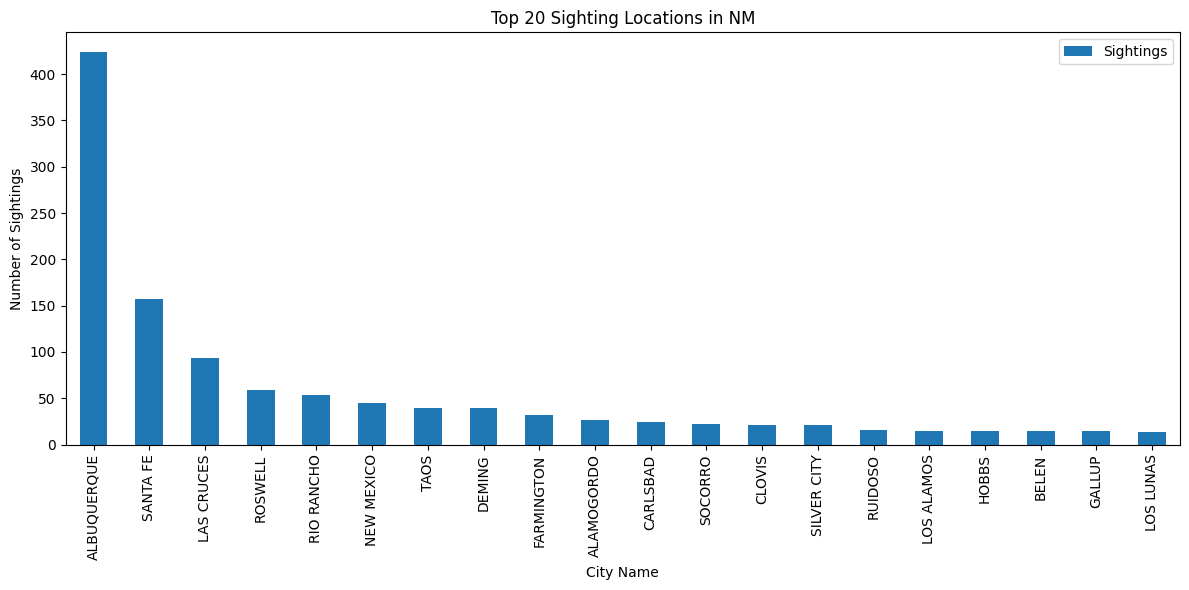

In [20]:
Top_20.plot(x='City_New', y='Sightings', kind='bar', figsize=(12, 6))
plt.title('Top 20 Sighting Locations in NM')
plt.xlabel('City Name')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##Data Search Tool

In [21]:
filtered_df = ufo_df[ufo_df['City_New'].str.contains('DZILTHNEW MEXICONANEW MEXICOONEW MEXICODITHLE')]
# Display the filtered dataframe
print(filtered_df)

Empty DataFrame
Columns: [Link, Occurred, City, State, Country, Shape, Summary, Reported, Media, Explanation, Latitude, Longitude, City_New]
Index: []


## Export Tool

In [22]:
city_counts_df.to_csv('city_counts.csv', index=False)

## Fill the N/A shapes with other, unless agreed otherwise.

In [23]:
#Fill the nan with 'Other'
ufo_df['Shape'] = ufo_df['Shape'].fillna('Other')

In [24]:
#Double check-see below Occurred & Summary are the only immaterial imbalances remaining in the data-PASS
ufo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1702 entries, 0 to 1702
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Link         1702 non-null   object 
 1   Occurred     1702 non-null   object 
 2   City         1702 non-null   object 
 3   State        1702 non-null   object 
 4   Country      1702 non-null   object 
 5   Shape        1702 non-null   object 
 6   Summary      1701 non-null   object 
 7   Reported     1702 non-null   object 
 8   Media        82 non-null     object 
 9   Explanation  22 non-null     object 
 10  Latitude     1702 non-null   object 
 11  Longitude    1702 non-null   float64
 12  City_New     1702 non-null   object 
dtypes: float64(1), object(12)
memory usage: 186.2+ KB
